In [16]:
import pandas as pd
import numpy as np
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split

import os
import sys
module_path = os.path.abspath(os.path.join(os.pardir))
if module_path not in sys.path:
    sys.path.append(module_path)
    
from src.functions import test_model, get_timeseries_table, add_model,\
add_hypersearch, test_model

import pickle

from IPython.display import display, clear_output

In [2]:
def jitter_students(col):
    jitter = np.random.normal(loc=0, 
                               scale=col.describe()['std']*0.1,
                               size = col.shape)
    jitter_col = col + jitter
    return jitter_col

In [3]:
prediction_window=135

model = pickle.load(open('time_series_xgb_best_smote.pkl', 'rb'))

df = get_timeseries_table(prediction_window=prediction_window, binary_labels=True, one_hot_modules=True)

X = df.drop('final_result', axis=1)
y = df['final_result']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=111)


assess_submitted_1  assess_score_1  assess_submitted_2  \
registration                                                              
AAA2013J11391                  -1.0            78.0                -1.0   
AAA2013J28400                   3.0            70.0                -2.0   
AAA2013J31604                  -2.0            72.0                -3.0   
AAA2013J32885                   7.0            69.0                21.0   
AAA2013J38053                   0.0            79.0                10.0   
...                             ...             ...                 ...   
GGG2014J681532                 14.0            60.0                 0.0   
GGG2014J682100                 -3.0            66.0                 0.0   
GGG2014J687523                 25.0             0.0                 0.0   
GGG2014J697314                 -2.0            70.0                 0.0   
GGG2014J1734156                21.0            65.0                 0.0   

                 assess_score_2  assess_submitted_3  assess_score_3  \
registration                                                          
AAA2013J11391              85.0                -2.0            80.0   
AAA2013J28400              68.0                 4.0            70.0   
AAA2013J31604              71.0                -2.0            74.0   
AAA2013J32885              30.0                 7.0            63.0   
AAA2013J38053              69.0                 0.0            74.0   
...                         ...                 ...             ...   
GGG2014J681532              0.0                 0.0             0.0   
GGG2014J682100              0.0                 0.0             0.0   
GGG2014J687523              0.0                 0.0             0.0   
GGG2014J697314              0.0                 0.0             0.0   
GGG2014J1734156             0.0                 0.0             0.0   

                 assess_submitted_4  assess_score_4  assess_submitted_5  \
registration                                                              
AAA2013J11391                   0.0             0.0                 0.0   
AAA2013J28400                   0.0             0.0                 0.0   
AAA2013J31604                   0.0             0.0                 0.0   
AAA2013J32885                   0.0             0.0                 0.0   
AAA2013J38053                   0.0             0.0                 0.0   
...                             ...             ...                 ...   
GGG2014J681532                  0.0             0.0                 0.0   
GGG2014J682100                  0.0             0.0                 0.0   
GGG2014J687523                  0.0             0.0                 0.0   
GGG2014J697314                  0.0             0.0                 0.0   
GGG2014J1734156                 0.0             0.0                 0.0   

                 assess_score_5  ...  sum_activities_134  sum_click_134  \
registration                     ...                                      
AAA2013J11391               0.0  ...                 0.0            0.0   
AAA2013J28400               0.0  ...                11.0           38.0   
AAA2013J31604               0.0  ...                 0.0            0.0   
AAA2013J32885               0.0  ...                 1.0            3.0   
AAA2013J38053               0.0  ...                 0.0            0.0   
...                         ...  ...                 ...            ...   
GGG2014J681532              0.0  ...                 0.0            0.0   
GGG2014J682100              0.0  ...                 0.0            0.0   
GGG2014J687523              0.0  ...                 2.0            3.0   
GGG2014J697314              0.0  ...                 3.0            6.0   
GGG2014J1734156             0.0  ...                 0.0            0.0   

                 activities_x_clicks_134  module_AAA  module_BBB  module_CCC  \
registration                                                                   
AAA20

In [21]:

model.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.3, eval_metric='error',
              gamma=0, gpu_id=-1, importance_type='gain',
              interaction_constraints='', learning_rate=0.09913587832863668,
              max_delta_step=0, max_depth=20, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=8,
              num_parallel_tree=1, random_state=111, reg_alpha=0, reg_lambda=1,
              scale_pos_weight=2.0, seed=111, subsample=1.0,
              tree_method='exact', use_label_encoder=False,
              validate_parameters=1, verbosity=None)

In [25]:
X_no_mods = X_test[X_test.columns[:-7]]
X_0_no_mods = X_no_mods[y_test == 0]
X_1_no_mods = X_no_mods[y_test == 1]

X_0_jittered = pd.DataFrame()
X_1_jittered = pd.DataFrame()

for col in X_0_no_mods.columns:
    X_0_jittered[col] = jitter_students(X_0_no_mods[col])
for col in X_1_no_mods.columns:
    X_1_jittered[col] = jitter_students(X_1_no_mods[col])

X_jittered = pd.concat([X_1_jittered, X_0_jittered], axis=0)
X_jittered = X_jittered.merge(X.iloc[:, -7:], how='left',
                             left_index=True, right_index=True)

0.8312642070292009


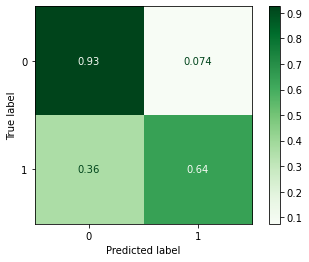

In [28]:
test_model(model, X_test, y_test, plot_confusion=True)

0.628781255464242


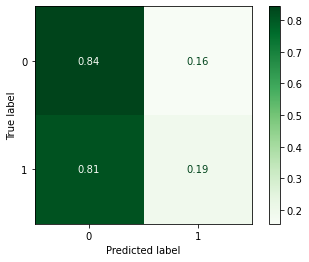

In [27]:
test_model(model, X_jittered, y_test, plot_confusion=True)